## EDA 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [254]:
df=pd.read_csv(r'C:\Users\Hrishabh\Downloads\BIKE DETAILS.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [6]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


### 1- What is the range of selling prices in the dataset

In [18]:
#solution :-
print('Range of selling prices in dataset between:-',df['selling_price'].max(),'to',df['selling_price'].min())
print('---------------------------')
print('selling prices :-',df['selling_price'].value_counts())

Range of selling prices in dataset between:- 760000 to 5000
---------------------------
selling prices :- selling_price
25000    77
35000    66
50000    63
40000    63
30000    62
         ..
39000     1
83299     1
14700     1
19000     1
31000     1
Name: count, Length: 130, dtype: int64


### 2- What is the median selling price for bikes in the dataset

In [23]:
# solution :-
print('Median selling price for bikes in the above dataset :-',df['selling_price'].median())

Median selling price for bikes in the above dataset :- 45000.0


### 3-  What is the most common seller type

In [28]:
# solution :-
print(df['seller_type'].value_counts())
print('----------------------')
print('Most common seller type is :- Individual ')

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
----------------------
Most common seller type is :- Individual 


### 4-  How many bikes have driven more than 50,000 kilometers

In [29]:
# solution :-

In [63]:
kms=df[df['km_driven']>50000].shape[0]
print('Bikes driven more than 50,000 kms :- ',kms)

Bikes driven more than 50,000 kms :-  170


### 5- What is the average km_driven value for each ownership type


In [64]:
# solution :-

In [79]:
print(df.groupby('owner')['km_driven'].sum())
print('-------------------------------')
print('Average km_driven value for each ownership :-')
print(df.groupby('owner')['km_driven'].mean())

owner
1st owner    30322523
2nd owner     4832546
3rd owner      366214
4th owner      934500
Name: km_driven, dtype: int64
-------------------------------
Average km_driven value for each ownership :-
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


### 6- What proportion of bikes are from the year 2015 or older

In [80]:
# solution :-

In [87]:
old_bikes=df[df['year']<=2015].shape[0]
tl=df['name'].shape[0]
pro=old_bikes/tl
print("Total number of bikes:", tl)
print("Number of bikes from 2015 or older:", old_bikes)
print("Proportion of bikes from 2015 or older:", pro)

Total number of bikes: 1061
Number of bikes from 2015 or older: 601
Proportion of bikes from 2015 or older: 0.5664467483506126


### 7-  What is the trend of missing values across the dataset

In [1]:
# solution :-

In [44]:
print('Nan values percentage :-',df['ex_showroom_price'].isnull().sum()/1061*100)
print("Total nan values :-",df['ex_showroom_price'].isnull().sum())

Nan values percentage :- 40.99905749293119
Total nan values :- 435


In [40]:
df['Nan']=df['ex_showroom_price'].isna()

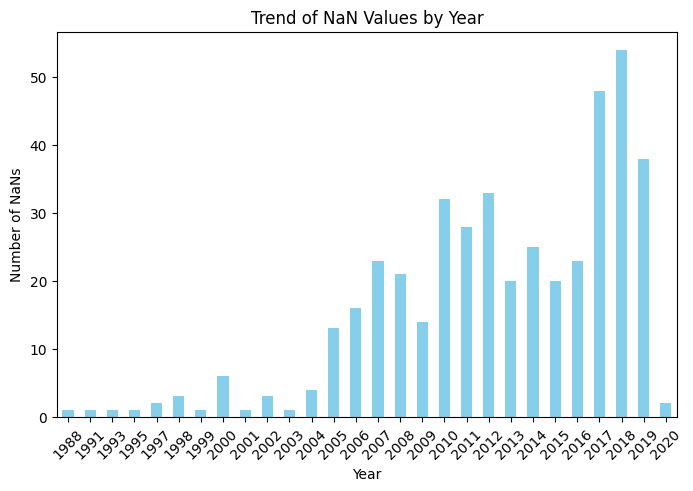

In [43]:
yea=df.groupby('year')['Nan'].sum()
plt.figure(figsize=(8, 5))
yea.plot(kind='bar', color='skyblue')
plt.title('Trend of NaN Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of NaNs')
plt.xticks(rotation=45)
plt.show()

### 8- What is the highest ex_showroom_price recorded, and for which bike

In [45]:
# solution :-

In [64]:
index_of_highest_price = df['ex_showroom_price'].idxmax() 
print('Highest ex showroom price recorded is -')
print('------------------------------------')
print(df.loc[index_of_highest_price])

Highest ex showroom price recorded is -
------------------------------------
name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Nan                                       False
Name: 134, dtype: object


### 9- What is the total number of bikes listed by each seller type

In [66]:
# solution :-

In [74]:
print('Total number of bikes listed by each seller type')
print('------------------------------')
print(df.groupby('seller_type')['name'].count())

Total number of bikes listed by each seller type
------------------------------
seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


### 10- What is the relationship between selling_price and km_driven for first-owner bikes

In [75]:
# solution :-

In [95]:
df[['selling_price','km_driven','owner']].corr(numeric_only=True)

,selling_price,km_driven
selling_price,1.000000,-0.212937
km_driven,-0.212937,1.000000


In [118]:
df=df.fillna(df['ex_showroom_price'].mean())


In [119]:
first= df[df['owner'] == '1st owner']
correl = first['selling_price'].corr(first['km_driven'])
print("Correlation between selling_price and km_driven for first-owner bikes:", correl)

Correlation between selling_price and km_driven for first-owner bikes: -0.2434817484496569


### 11 Identify and remove outliers in the km_driven column using the IQR method

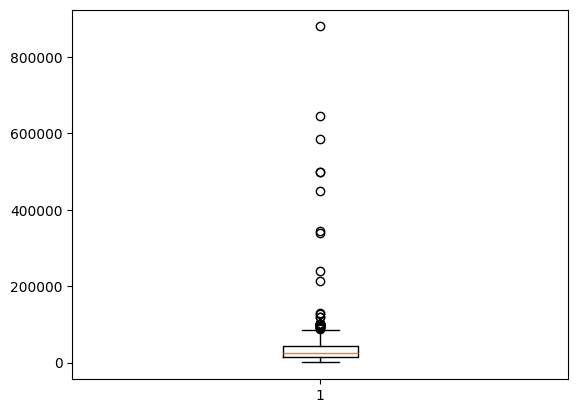

In [5]:
# solution :-
plt.boxplot(df['km_driven'])
plt.show()

In [6]:
q1=df['km_driven'].quantile(0.25)
q3=df['km_driven'].quantile(0.75)
iqr=q3-q1

In [8]:
lowerfence=q1-1.5*iqr
upperfence=q3+1.5*iqr

In [15]:
df_filtered=df[(df['km_driven']>=lowerfence)&(df['km_driven']<=upperfence)]

In [16]:
df.shape

(1061, 7)

In [17]:
df_filtered.shape

(1022, 7)

In [20]:
df['km_driven_mean']=np.where((df['km_driven']>=upperfence)|(df['km_driven']<=lowerfence),df['km_driven'].mean(),df['km_driven'])

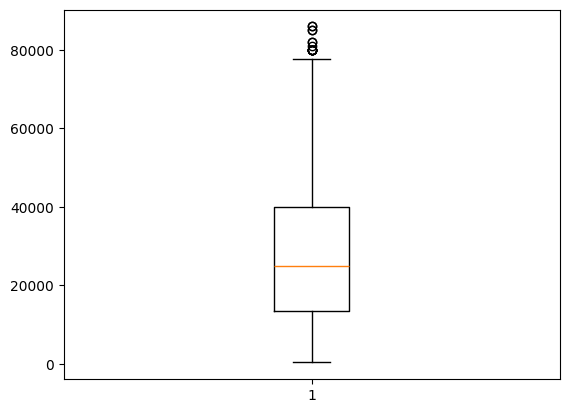

In [23]:
plt.boxplot(df['km_driven_mean'])
plt.show()

### 12-  Perform a bivariate analysis to visualize the relationship between year and selling_price

In [24]:
# solution :-

In [36]:
n=df.groupby('year')['selling_price'].sum().reset_index()

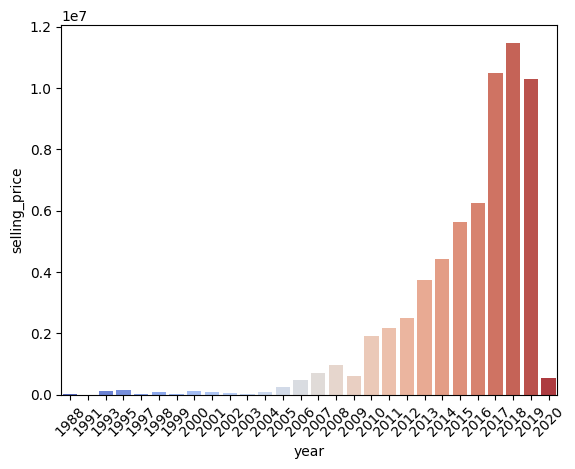

In [52]:
sns.barplot(x=n['year'],y=n['selling_price'],palette='coolwarm')
plt.xticks(rotation=45)
plt.show(
)

In [49]:
n.corr()

,year,selling_price
year,1.000000,0.710977
selling_price,0.710977,1.000000


In [ ]:
'''
there is a positive correlation between year and selling_price
'''

### 13-What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [53]:
# solution :-

In [255]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [257]:
current_year=2024
df['age'] = current_year - df['year']

In [259]:
age_price = df.groupby('age').agg({'selling_price': 'mean','ex_showroom_price': 'mean'}).reset_index()

In [260]:
age_price['depreciation'] = (age_price['ex_showroom_price'] - age_price['selling_price']) / age_price['ex_showroom_price'] * 100

In [261]:
print(age_price)

    age  selling_price  ex_showroom_price  depreciation
0     4  183333.333333      155740.000000    -17.717563
1     5  119689.511628      114079.562500     -4.917576
2     6   87660.374046      100860.857143     13.087816
3     7   78894.736842       92835.494118     15.016624
4     8   58469.018692       81925.630952     28.631592
5     9   56500.000000       82563.275000     31.567637
6    10   48668.131868       83958.636364     42.033204
7    11   51136.986301       95435.943396     46.417477
8    12   35748.400000       70128.135135     49.024169
9    13   35655.721311       83890.545455     57.497330
10   14   31793.333333       77716.071429     59.090401
11   15   22267.857143       60870.642857     63.417739
12   16   34289.285714       74603.857143     54.038186
13   17   24927.586207       67382.333333     63.005754
14   18   23380.000000       51164.500000     54.304254
15   19   16978.571429       54852.000000     69.046577
16   20   15100.000000       54852.000000     72

In [256]:
df.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN


### 14- Which bike names are priced significantly above the average price for their manufacturing year

In [84]:
# solution
average_prices = df.groupby('year')['ex_showroom_price'].mean()
average_prices

year
1988              NaN
1991              NaN
1993              NaN
1995              NaN
1997         0.000000
1998         0.000000
1999              NaN
2000         0.000000
2001     23409.982013
2002         0.000000
2003              NaN
2004     14805.772629
2005      8848.141515
2006     15210.179702
2007     10856.317833
2008      8451.164197
2009     17713.276302
2010     34184.887301
2011     69740.047800
2012     21690.871241
2013    142198.056807
2014     57301.169891
2015     37261.339852
2016     45359.398794
2017     54620.830397
2018     40014.734384
2019     82337.741666
2020     39133.543685
Name: ex_showroom_price, dtype: float64

In [79]:
average_prices = df.groupby('year')['ex_showroom_price'].mean()
# Check which bikes are significantly above average
significant_bikes = df[df['ex_showroom_price'] > (df['year'].map(average_prices))]
print("Bikes Priced Significantly Above Average:")
print(significant_bikes[['name', 'year', 'ex_showroom_price']])

Bikes Priced Significantly Above Average:
                         name  year  ex_showroom_price
115   Hero Honda Passion Plus  2004       14805.772629
349  Hero Honda Splendor Plus  2004       14805.772629
894                TVS Victor  2004       14805.772629
903  Hero Honda Splendor Plus  2004       14805.772629
949               Bajaj Boxer  2004       14805.772629


### 15-  Develop a correlation matrix for numeric columns and visualize it using a heatmap

In [89]:
# solution :-

In [91]:
hp=df1.corr(numeric_only=True)

<Axes: >

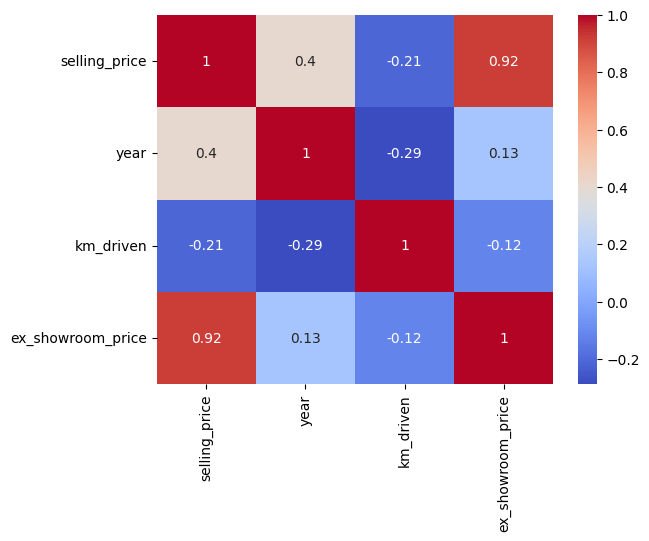

In [94]:
sns.heatmap(hp,cmap='coolwarm',annot=True)

# EDA 2

In [2]:
df=pd.read_csv(r'C:\Users\Hrishabh\Downloads\Car Sale.csv')

In [12]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

### 1- What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [9]:
# solution :-

In [31]:
n=df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
n

,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


In [33]:
n.groupby(df['Dealer_Region']).sum()

,Dealer_Name,Price ($)
Dealer_Region,,
Aurora,C & M Motors IncMcKinney Dodge Chrysler JeepNe...,83662.984135
Austin,Clay Johnson Auto SalesDiehl Motor CO IncHatfi...,167837.592379
Greenville,Capitol KIAMotor Vehicle Branch OfficePars Aut...,84159.503756
Janesville,Chrysler of Tri-CitiesProgressive Shippers Coo...,112890.329341
Middletown,Buddy Storbeck's Diesel Service IncNebo Chevro...,83226.290867
Pasco,Chrysler PlymouthEnterprise Rent A CarIceberg ...,140092.685729
Scottsdale,Classic ChevyGartner Buick Hyundai SaabRabun U...,113489.378400


In [ ]:
# most dealers who are from Austin selled more cars

### 2- Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [34]:
# solution :-

In [54]:
vr=df.groupby('Company')['Price ($)'].sum().reset_index()
vr

,Company,Price ($)
0,Acura,17058649
1,Audi,10694638
2,BMW,19821592
3,Buick,14765485
4,Cadillac,26713805
5,Chevrolet,47655265
6,Chrysler,29141873
7,Dodge,44124996
8,Ford,47231583
9,Honda,19882735


In [79]:
# highest variation in prices 
price_variation = df.groupby('Company')['Price ($)'].std()
# Identify the company with the highest variation
highest_variation_company = price_variation.idxmax()
highest_variation_value = price_variation.max()
print(f"The company with the highest variation in prices is {highest_variation_company}")
print(f"with a standard deviation of {highest_variation_value}.")
print(vr.loc[15])

The company with the highest variation in prices is Lincoln
with a standard deviation of 19658.050211265567.
Company       Lincoln
Price ($)    15452262
Name: 15, dtype: object


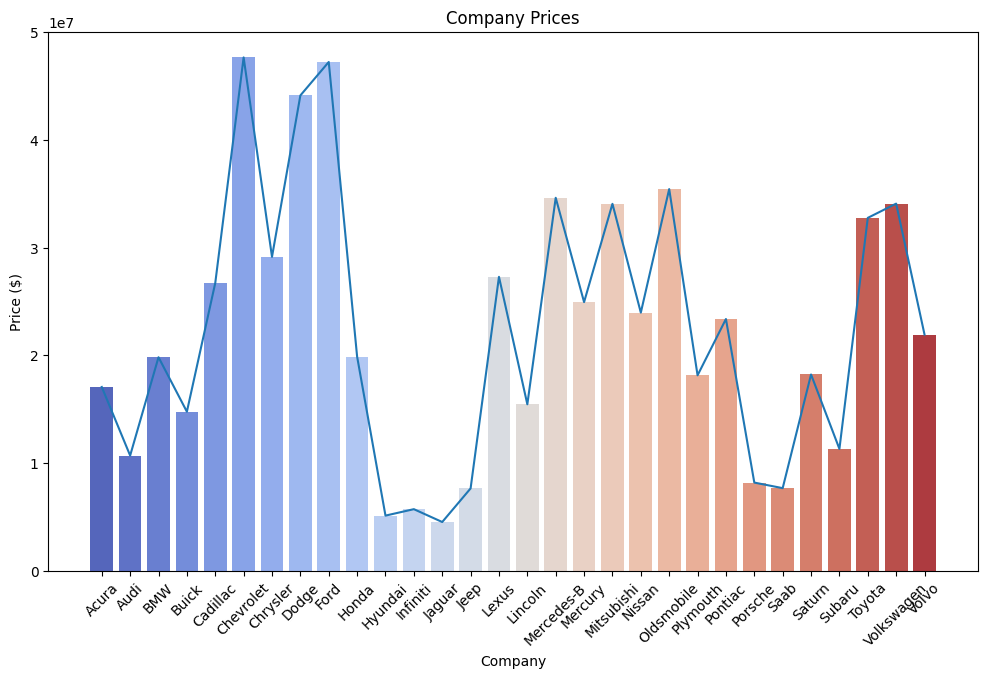

In [82]:
plt.figure(figsize=(12,7))
sns.barplot(x=vr['Company'],y=vr['Price ($)'],palette='coolwarm')
plt.plot(vr['Company'],vr['Price ($)'])
plt.xlabel('Company')
plt.ylabel('Price ($)')
plt.title('Company Prices')
plt.xticks(rotation=45)  # Rotates the x-labels for better readability
plt.show()

In [ ]:
'''
The company with the highest variation in prices might indicate that it offers a wider range
of models, from budget options to luxury vehicles, or that there are significant differences 
in price based on model specifications, features, or market demand
'''

### 3- What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

In [83]:
# solution:-

In [85]:
iqrvalues=df.groupby('Transmission')['Price ($)'].quantile(0.75)
df.groupby('Transmission')['Price ($)'].quantile(0.25)

Transmission
Auto      19000.0
Manual    17000.0
Name: Price ($), dtype: float64

In [86]:
print('Interquantile ranges :',iqrvalues)

Interquantile ranges : Transmission
Auto      35500.0
Manual    34000.0
Name: Price ($), dtype: float64


<Figure size 1000x600 with 0 Axes>

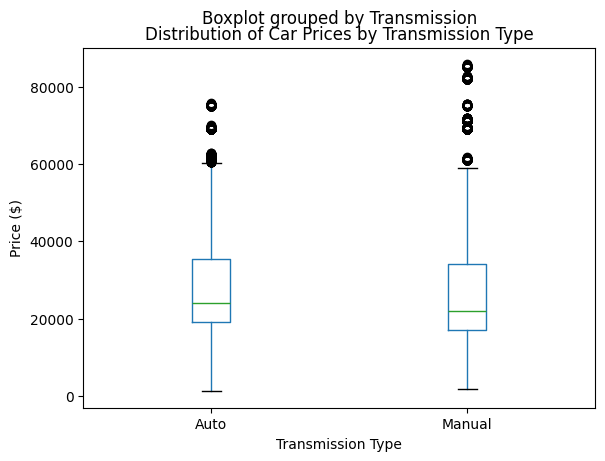

In [87]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Price ($)', by='Transmission')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.grid(False)
plt.show()

### 4-  What is the distribution of car prices across different regions

In [88]:
# solution :-

In [91]:
price_statistics = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Descriptive statistics of car prices across regions:")
print(price_statistics)

Descriptive statistics of car prices across regions:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0

In [92]:
iqr_values = df.groupby('Dealer_Region')['Price ($)'].quantile(0.75) - df.groupby('Dealer_Region')['Price ($)'].quantile(0.25)
print("\nInterquartile ranges (IQR) of car prices by region:")
print(iqr_values)


Interquartile ranges (IQR) of car prices by region:
Dealer_Region
Aurora        16999.0
Austin        17000.0
Greenville    16499.0
Janesville    15999.0
Middletown    16000.0
Pasco         15499.5
Scottsdale    15500.0
Name: Price ($), dtype: float64


<Figure size 600x1000 with 0 Axes>

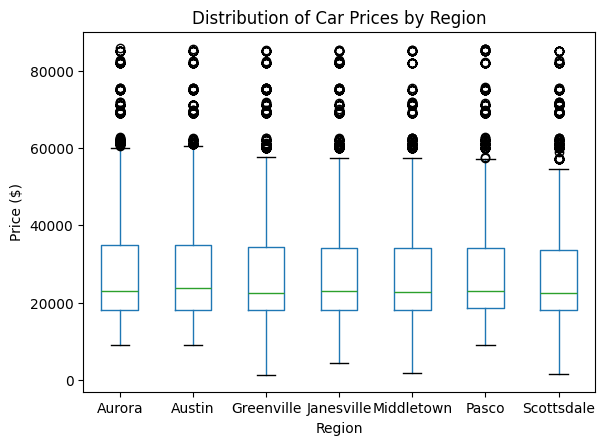

In [101]:
plt.figure(figsize=(6, 10))
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False)
plt.title('Distribution of Car Prices by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

### 5-  What is the distribution of cars based on body styles

In [102]:
# solution :-

In [103]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [126]:
bd=df['Body Style'].value_counts().reset_index()
bd

,Body Style,count
0,SUV,6374
1,Hatchback,6128
2,Sedan,4488
3,Passenger,3945
4,Hardtop,2971


<Figure size 1000x600 with 0 Axes>

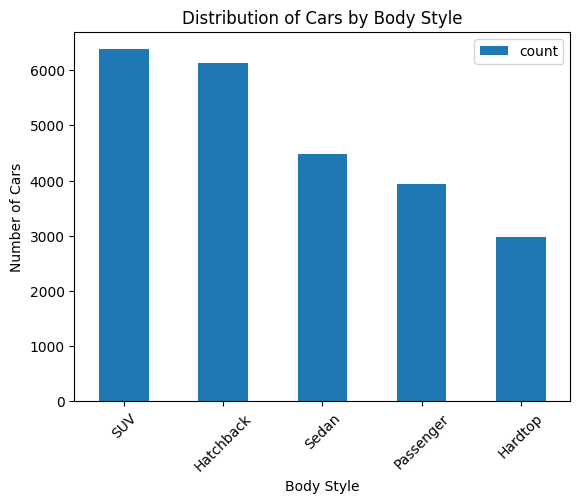

In [133]:
plt.figure(figsize=(10, 6))
bd.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.xticks(range(len(bd.index)), bd['Body Style'])
plt.show()

### 6- How does the average selling price of cars vary by customer gender and annual income

In [13]:
# solution :-
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [14]:
df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()


,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


### 7-  What is the distribution of car prices by region, and how does the number of cars sold vary by region


In [18]:
# solution :-

In [15]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [31]:
s=df.groupby('Dealer_Region')['Price ($)'].sum().reset_index()
s

,Dealer_Region,Price ($)
0,Aurora,88687382
1,Austin,117192531
2,Greenville,88149602
3,Janesville,106351234
4,Middletown,87134628
5,Pasco,88040714
6,Scottsdale,95969374


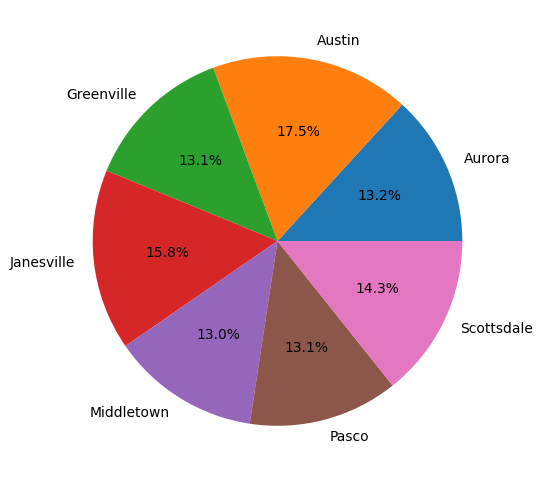

In [41]:
plt.figure(figsize=(6,6))
plt.pie(s['Price ($)'], labels=s['Dealer_Region'], autopct='%1.1f%%')
plt.show()

In [ ]:
'''
In Austin there should be more variety of car models and there different prices 
that's why Austin Dealers doing more sales than any other region
'''

### 8 How does the average car price differ between cars with different engine sizes

In [43]:
# solution :-
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [50]:
df.groupby(['Company','Engine'])['Price ($)'].mean().reset_index().sort_values(by='Price ($)',ascending=False)

,Company,Engine,Price ($)
28,Lexus,Overhead Camshaft,46471.861027
8,Cadillac,DoubleÂ Overhead Camshaft,43568.836461
47,Saab,DoubleÂ Overhead Camshaft,38090.807910
9,Cadillac,Overhead Camshaft,37500.462366
44,Pontiac,Overhead Camshaft,36728.391003
30,Lincoln,Overhead Camshaft,36541.003021
6,Buick,DoubleÂ Overhead Camshaft,35176.835088
42,Plymouth,Overhead Camshaft,34766.663522
50,Saturn,Overhead Camshaft,34545.748815
39,Oldsmobile,DoubleÂ Overhead Camshaft,34164.810193


In [ ]:
'''
Lexus company is selling highest number of cars means there should be variety of cars in 
Lexus company which customers likes

lowes selling is going in Jeep the reason sould be less number of variety ,availability in 
regions
'''

### 9 How do car prices vary based on the customer’s annual income bracket

In [51]:
# solution :-

In [52]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [64]:
df['Annual Income'].unique()

array([  13500, 1480000, 1035000, ...,  374060, 4111000, 1369000])

In [67]:
bins = [0, 30000, 60000, 90000, 120000,500000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-500k','>1400000']

In [74]:
df['Income'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False)
price_variation = df.groupby('Income')['Price ($)'].agg(['mean', 'median', 'count'])
print(pd.DataFrame(price_variation))

                   mean   median  count
Income                                 
<30k       27884.297820  22001.0   5275
30k-60k             NaN      NaN      0
60k-90k    43000.000000  43000.0      1
90k-120k   46001.000000  46001.0      1
120k-500k  28497.024274  24000.0   2101
>1400000   28102.283700  23000.0  16528


In [ ]:
''' high count (like 16528) in one of the rows could indicate that a lot of people 
    in that income bracket are buying cars, suggesting a larger market or demand for 
    cars in that price range.
    a low count might indicate that fewer people in that bracket are able to afford 
    cars at higher price points
    
     '''

### 10-What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [75]:
# solution :-

In [76]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income'],
      dtype='object')

In [93]:
price_d=df.groupby('Model')['Price ($)'].sum().sort_values(ascending=False).head(5).reset_index()
price_d.columns=['Model', 'Total Price ($)']
print(price_d)

           Model  Total Price ($)
0          LS400         14263424
1          Jetta         12287736
2     Silhouette         12271849
3  Montero Sport         11472231
4     Ram Pickup         10655391


<Axes: ylabel='Count'>

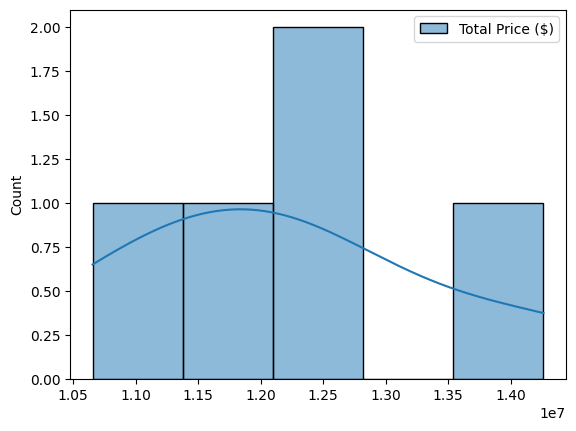

In [100]:
sns.histplot(price_d,bins=5,kde=True)

<Axes: >

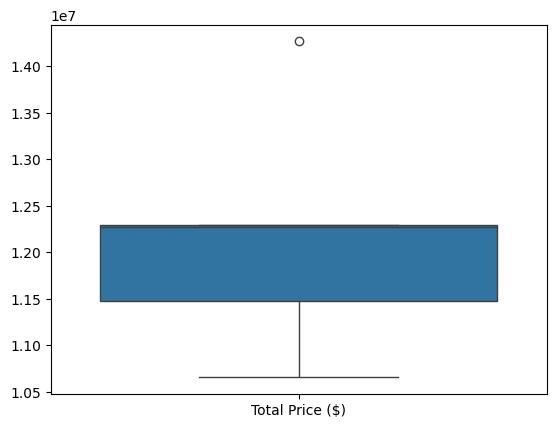

In [101]:
sns.boxplot(price_d)

### 11 - How does car price vary with engine size across different car colors, and which colors have the highest price variation

In [102]:
# solution :-

In [12]:
k=df.groupby(['Engine','Color'])['Price ($)'].agg(['mean','std']).reset_index()
k

,Engine,Color,mean,std
0,DoubleÂ Overhead Camshaft,Black,25766.451103,12418.674126
1,DoubleÂ Overhead Camshaft,Pale White,30347.987460,14402.413401
2,DoubleÂ Overhead Camshaft,Red,27434.392314,13499.354247
3,Overhead Camshaft,Black,31732.967164,17457.405345
4,Overhead Camshaft,Pale White,24327.767694,13000.103061
5,Overhead Camshaft,Red,30153.405229,17346.642554


In [18]:
cvion=k.groupby('Color')['std'].sum().sort_values( ascending=False).reset_index()
cvion

,Color,std
0,Red,30845.996801
1,Black,29876.079471
2,Pale White,27402.516462


In [ ]:
'''
 red color car has the highest price variation among all the colors in your dataset, 
 it means that the prices of red cars show a significant range of difference
 compared to other colored cars when considering their engine sizes
'''

### 12 Is there any seasonal trend in car sales based on the date of sale

In [19]:
# solution :-

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [81]:
ms=df.groupby(['year', 'month'])['Price ($)'].sum().reset_index()

In [66]:
msp = ms.pivot(index='month', columns='year', values='Price ($)')
msp

year,2022,2023
month,,
1,8931920,12764298
2,8795365,11848580
3,19502059,22203814
4,22748867,24115567
5,20608086,32613157
6,19604211,28901691
7,19935002,28243030
8,23631362,25162276
9,42218216,51416962


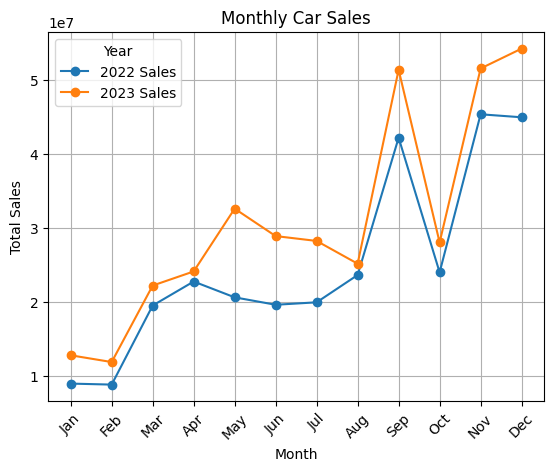

In [90]:
plt.plot(msp.index, msp[2022], marker='o', label='2022 Sales')
plt.plot(msp.index, msp[2023], marker='o', label='2023 Sales')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.xticks(monthly_sales_pivot.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=45)
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid()
plt.show()

In [80]:
# there is a increase in car sales between aug to sep and then oct to dec 
# it may indicate that there are festivals between these months in which people buy cars
# every year trend is almost similar

### 13 How does the car price distribution change when considering different combinations of body style and transmission type

In [82]:
# solution :-

In [110]:
df.groupby(['Body Style','Transmission'])['Price ($)'].sum().sort_values(ascending=False).reset_index()

,Body Style,Transmission,Price ($)
0,Hatchback,Auto,89598664
1,SUV,Manual,85747815
2,SUV,Auto,84869334
3,Sedan,Auto,77853810
4,Hatchback,Manual,76635810
5,Passenger,Auto,58409987
6,Sedan,Manual,56035809
7,Passenger,Manual,55766328
8,Hardtop,Auto,44380425
9,Hardtop,Manual,42227483


In [112]:
# we can see the more luxuary  branding and auto transmission of the car
# the more it will cost 
# mostly people liked hatchback body style car and auto transmission car

### 14- What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

In [3]:
# solution :-

In [5]:
cols=df[['Price ($)','Engine','Annual Income']]

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder=LabelEncoder()

In [16]:
cols['Engine']=label_encoder.fit_transform(cols['Engine'])

In [18]:
cols.corr()

,Price ($),Engine,Annual Income
Price ($),1.000000,-0.011271,0.012065
Engine,-0.011271,1.000000,-0.006598
Annual Income,0.012065,-0.006598,1.000000


In [ ]:
'''
Price ($) and Engine : The correlation coefficient is -0.011271
                       as one variable changes, the other does not show any consistent
                       pattern of increase or decrease.

Price ($) and Annual Income: The correlation coefficient is 0.012065
                             this suggests a negligible linear relationship between 
                             price and annual income.
                             Changes in annual income seem to have no impact on the 
                             price of the product.

Engine and Annual Income: The correlation coefficient here is -0.006598
                           there is virtually no linear relationship between the engine variable and annual income, 
                           suggesting that changes in one do not influence the other.
'''

### 15 How does the average car price vary across different car models and engine types?

In [25]:
# solution :-

In [42]:
n=df.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()

In [44]:
n

,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


<Axes: xlabel='Price ($)', ylabel='Count'>

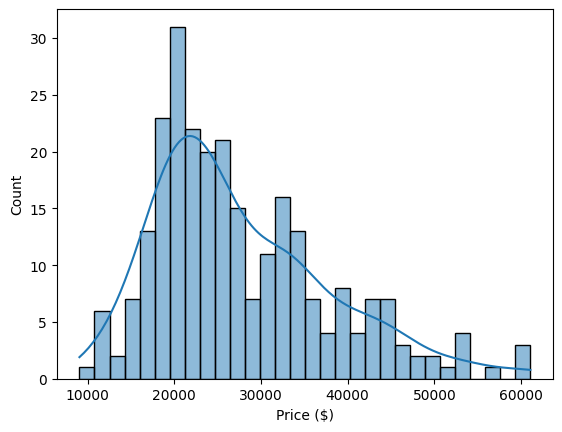

In [55]:
sns.histplot(n['Price ($)'],bins=30,kde=True)

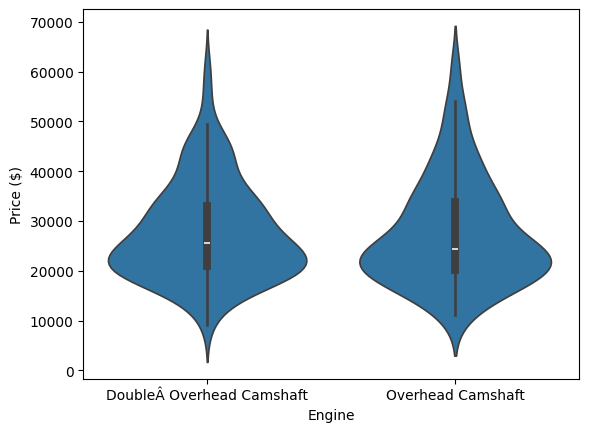

In [57]:
sns.violinplot(x=n['Engine'], y=n['Price ($)'], data=n)
plt.show()

In [58]:
# Histogram to assess overall price distribution
# -It helps identify how prices are distributed across different ranges.


# Violin Plot for price distribution per engine type.
# - This is helpful in observing the density of the data's distribution.

# EDA 3

In [311]:
df=pd.read_csv(r"C:\Users\Hrishabh\Downloads\amazon.csv")
dff=pd.read_csv(r"C:\Users\Hrishabh\Downloads\amazon.csv")

In [312]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 1-  What is the average rating for each product category

In [308]:
# solution :-
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'acutal_price'],
      dtype='object')

In [112]:
exploded_df.groupby('category')['rating'].mean().reset_index()

,category,rating
0,3DGlasses,3.500000
1,AVReceivers&Amplifiers,4.000000
2,Accessories,4.040541
3,Accessories&Peripherals,4.148556
4,Adapters,4.100000
...,...,...
312,WetGrinders,3.800000
313,WireboundNotebooks,4.400000
314,WirelessUSBAdapters,4.094444
315,WoodenPencils,4.300000


### 2- What are the top rating_count products by category

In [113]:
# solution :-

In [129]:
tp=exploded_df.groupby('category')['rating_count'].sum().sort_values(ascending=False).reset_index()
# we want to see if only 10 highest value
tp.head(10)

,category,rating_count
0,Home&Kitchen,46353.0
1,Electronics,33330.0
2,Computers&Accessories,33029.0
3,Kitchen&HomeAppliances,31697.0
4,Accessories&Peripherals,31495.0
5,Cables,26887.0
6,Cables&Accessories,25320.0
7,USBCables,24503.0
8,"HomeTheater,TV&Video",20165.0
9,SmallKitchenAppliances,17312.0


In [136]:
max_index = tp['rating_count'].idxmax()
highest_category = tp.loc[max_index, 'category']
pri=tp.loc[max_index,'rating_count']
print(f"The category with the highest rating count is: '{highest_category}' with a rating count of: {pri}")

The category with the highest rating count is: 'Home&Kitchen' with a rating count of: 46353.0


### 3- What is the distribution of discounted prices vs. actual prices

In [137]:
# solution :-

In [285]:
exploded_df['actual_price'] = exploded_df['actual_price'].replace({'₹':'', ',':'',' ':''}, regex=True).astype(float)

In [268]:
exploded_df['discounted_price'] = exploded_df['discounted_price'].replace({'₹':'',',':''}, regex=True).astype(float)

In [274]:
print("Summary Statistics:")
print("Actual Price - Mean:", exploded_df['actual_price'].mean())
print("Discounted Price - Mean:", exploded_df['discounted_price'].mean())
print("Actual Price - Median:", exploded_df['actual_price'].median())
print("Discounted Price - Median:", exploded_df['discounted_price'].median())

Summary Statistics:
Actual Price - Mean: 5444.989078498294
Discounted Price - Mean: 3125.3108737201364
Actual Price - Median: 1650.0
Discounted Price - Median: 799.0


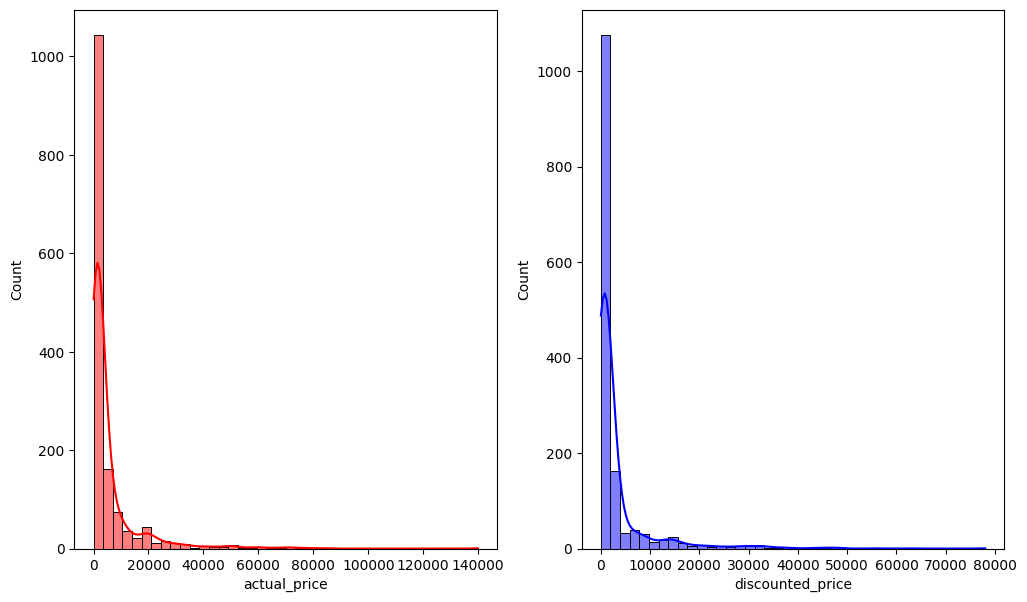

In [287]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(exploded_df['actual_price'],bins=40,kde=True,color='red')
plt.subplot(1,2,2)
sns.histplot(exploded_df['discounted_price'],bins=40,kde=True,color='blue')
plt.show()

### 4-How does the average discount percentage vary across categories

In [288]:
# solution :-

In [315]:
df['category'] = df['category'].str.split('|')
exploded_df = df.explode('category')

In [317]:
exploded_df['discount_percentage']=exploded_df['discount_percentage'].replace({'%':''},regex=True).astype(float)

In [319]:
exploded_df.groupby('category')['discount_percentage'].mean().reset_index()

,category,discount_percentage
0,3DGlasses,23.000000
1,AVReceivers&Amplifiers,36.000000
2,Accessories,57.036036
3,Accessories&Peripherals,55.979003
4,Adapters,79.600000
...,...,...
312,WetGrinders,21.500000
313,WireboundNotebooks,5.750000
314,WirelessUSBAdapters,49.111111
315,WoodenPencils,0.000000


### 5- ' What are the most popular product names

In [320]:
# solution :-

In [336]:
exploded_df['rating__count']=exploded_df['rating_count'].replace({',':''},regex=True).astype(float)

In [337]:
exploded_df['rating']=pd.to_numeric(exploded_df['rating'],errors='coerce')

In [342]:
exploded_df['rating_count']=pd.to_numeric(exploded_df['rating_count'],errors='coerce')

In [345]:
exploded_df.groupby(['product_name','rating'])['rating_count'].sum().sort_values(ascending=False).reset_index()

,product_name,rating,rating_count
0,Duracell USB Lightning Apple Certified (Mfi) B...,4.5,12225.0
1,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,4.3,9740.0
2,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,4.1,9030.0
3,Wecool Unbreakable 3 in 1 Charging Cable with ...,4.2,6560.0
4,"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...",4.0,5755.0
...,...,...,...
1332,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,4.2,0.0
1333,MI 80 cm (32 inches) HD Ready Smart Android LE...,4.2,0.0
1334,MI Braided USB Type-C Cable for Charging Adapt...,4.4,0.0
1335,MI Power Bank 3i 20000mAh Lithium Polymer 18W ...,4.3,0.0


### 6-  What are the most popular product keywords

In [346]:
 # solution :-

In [351]:
text_data = exploded_df['product_name'].astype(str) + ' ' + \
            exploded_df['about_product'].astype(str) + ' ' + \
            exploded_df['review_content'].astype(str)

text_series = pd.Series(text_data)


In [352]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer to tokenize and count words
vectorizer = CountVectorizer(stop_words='english')
word_count_matrix = vectorizer.fit_transform(text_series)

# Get the vocabulary (list of words)
vocabulary = vectorizer.get_feature_names_out()

# Sum the counts of each word
word_counts = word_count_matrix.sum(axis=0)
word_count_dict = {word: word_counts[0, idx] for word, idx in zip(vocabulary, range(len(vocabulary)))}

In [353]:
# Create a DataFrame
keyword_counts_df = pd.DataFrame(word_count_dict.items(), columns=['keyword', 'count'])

# Sort the keywords based on their counts
keyword_counts_df = keyword_counts_df.sort_values(by='count', ascending=False)

# Display the most common keywords
print(keyword_counts_df.head(10))  # Display top 10 most popular keywords

        keyword  count
8255       good  27538
13153   product  18951
4299      cable  13102
13445   quality  11815
17263       use   9907
17254       usb   9263
4645   charging   9125
6723       easy   6865
10327      like   6006
13049     price   5863


### 7- What are the most popular product reviews

In [354]:
# solution :-

In [355]:
exploded_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating__count'],
      dtype='object')

In [365]:
exploded_df.groupby('product_name')['review_title'].value_counts().sort_values(ascending=False).reset_index()

,product_name,review_title,count
0,AmazonBasics New Release Nylon USB-A to Lightn...,"Good product but costly,It’s really long n stu...",15
1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"As good as original,Decent,Good one for second...",15
2,Flix Micro Usb Cable For Smartphone (Black),"Worked on iPhone 7 and didn’t work on XR,Good ...",15
3,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...","Worth the money,Good smart watch,the screen do...",15
4,Sounce Fast Phone Charging Cable & Data Sync U...,"Good speed for earlier versions,Good Product,W...",15
...,...,...,...
1343,"Duracell CR2025 3V Lithium Coin Battery, 5 pcs...","Very good,Worth the Buy,Good,manufacturing dat...",2
1344,"Duracell CR2016 3V Lithium Coin Battery, 5 pcs...","Good product 👌,5 bati,Charge seems to be very ...",2
1345,Acer EK220Q 21.5 Inch (54.61 cm) Full HD (1920...,"Good monitor in this price range,My Best Buy i...",2
1346,Oakter Mini UPS for 12V WiFi Router Broadband ...,Very useful product - but hardware is not so s...,2


### 8-  What is the correlation between discounted_price and rating

In [366]:
#solution :-

In [368]:
colu=exploded_df[['discounted_price','rating']]

In [374]:
colu['discounted_price']=colu['discounted_price'].replace({'₹':'',',':'',' ':''},regex=True).astype(float)

In [377]:
colu.corr()

,discounted_price,rating
discounted_price,1.00000,0.11106
rating,0.11106,1.00000


### 9-  What are the Top 5 categories based on the highest ratings

In [378]:
# solution :-

In [379]:
exploded_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating__count'],
      dtype='object')

In [395]:
exploded_df.groupby(['category','rating'])['rating_count'].sum().sort_values(ascending=False).reset_index().head(5)

,category,rating,rating_count
0,Home&Kitchen,4.1,7765.0
1,Accessories&Peripherals,4.1,7168.0
2,Computers&Accessories,4.1,7168.0
3,Computers&Accessories,4.3,7010.0
4,Accessories&Peripherals,4.3,6936.0


### 10-Identify any potential areas for improvement or optimization based on the data analysis

In [396]:
# solution :-

In [397]:
exploded_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating__count'],
      dtype='object')

In [409]:
exploded_df.groupby(['category','review_title','review_content'])['rating'].sum().sort_values().reset_index().head(15)

,category,review_title,review_content,rating
0,Vacuums&FloorCare,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",0.0
1,Home&Kitchen,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",0.0
2,HandheldVacuums,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",0.0
3,Kitchen&HomeAppliances,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",0.0
4,Vacuums,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",0.0
5,"Vacuum,Cleaning&Ironing","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",0.0
6,FanHeaters,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2.0
7,Home&Kitchen,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2.0
8,"Heating,Cooling&AirQuality","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2.0
9,RoomHeaters,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2.0


In [408]:
# if we see some sample reviews here we can identify that some products customers didn't liked

# From Home Vaccum and floor care- dosen't work on sand we can increase its power to pick dust .

# From Fan Heaters- The quality is bad , heating capacity is zero so we can built a good quality product
#                  heating capacity is zero so we can work on its capacity and heating function

# From Room Heaters -heating capacity is zero so we can work on its capacity and heating function
#                    we have to work on built in quality


In [ ]:
'''
from the above sample :-
mostly home appliances are bad in build in quality and poor capacity or already broken

by improving these product quality ,capacity and features we can improve our ratings and sales 
'''

# EDA 4

In [3]:
df=pd.read_csv(r'C:\Users\Hrishabh\Downloads\spotify.csv')

In [5]:
df.head(2)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0


### 1- Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [6]:
# solution :-

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [7]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(27)

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

### 2-  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

In [12]:
# solution  :-

In [13]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [18]:
his=df.groupby('Track Name')['Popularity'].sum().reset_index()
his

,Track Name,Popularity
0,20 Min,84
1,3 Headed Goat (feat. Lil Baby & Polo G),75
2,3D (feat. Jack Harlow),84
3,4:44,74
4,6 Foot 7 Foot,74
...,...,...
407,pop ur shit,79
408,prove it,82
409,pushin P (feat. Young Thug),75
410,redrum,96


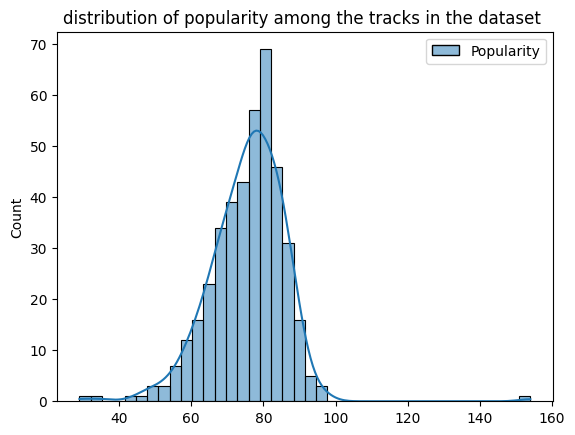

In [29]:
plt.title('distribution of popularity among the tracks in the dataset ')
sns.histplot(his,bins=40,kde=True)
plt.show()

###  3-is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [30]:
# solution :-

In [31]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [46]:
cls=df[['Popularity','Duration (ms)']].reset_index()

In [35]:
cls.corr()

,Popularity,Duration (ms)
Popularity,1.000000,0.038992
Duration (ms),0.038992,1.000000


In [ ]:
# there is a indicates a very weak positive correlation relation between duration and popularity

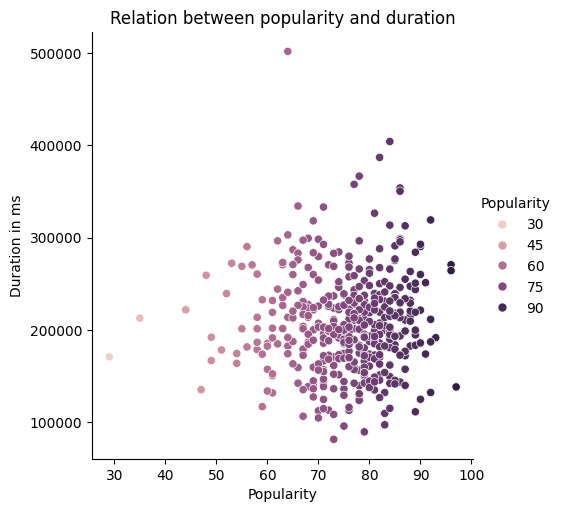

In [68]:
sns.relplot(x=cls['Popularity'],y=cls['Duration (ms)'],hue=cls['Popularity'],cmap='coolwarm')
plt.title('Relation between popularity and duration')
plt.xlabel('Popularity')
plt.ylabel('Duration in ms')
plt.show()

### 4-Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [63]:
# solution :-

In [64]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [97]:
re=df['Artist'].value_counts().reset_index()
re

,Artist,count
0,Drake,17
1,Eminem,11
2,Flo Rida,10
3,Ludacris,10
4,Timbaland,10
...,...,...
110,Arizona Zervas,1
111,Fivio Foreign,1
112,Pressa,1
113,David Guetta,1


In [105]:
max_artist =re.iloc[0]
print(f"Artist with the highest number of tracks: {max_artist['Artist']} with {max_artist['count']} tracks")

Artist with the highest number of tracks: Drake with 17 tracks


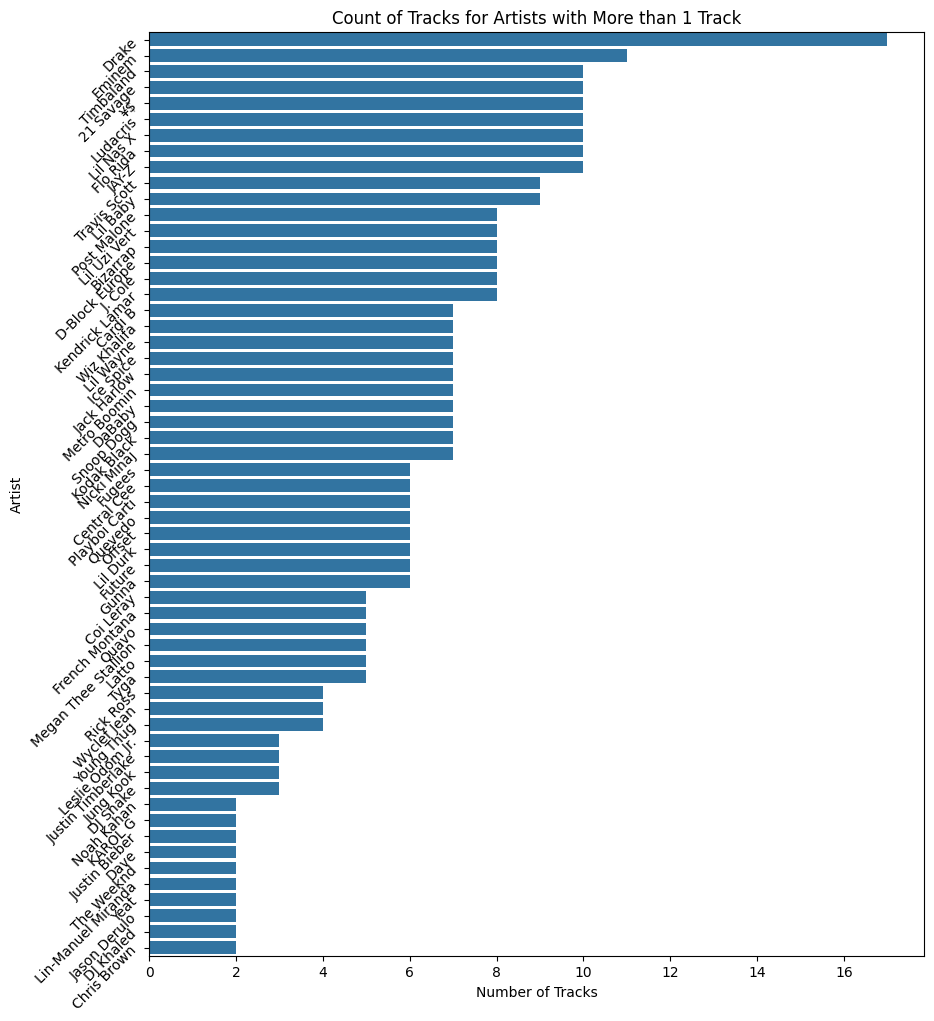

In [129]:
artist_counts = df['Artist'].value_counts()
more_than_one_artist = artist_counts[artist_counts > 1].index
filtered_data = df[df['Artist'].isin(more_than_one_artist)]
plt.figure(figsize=(10, 12)) 
sns.countplot(data=filtered_data, y='Artist', order=filtered_data['Artist'].value_counts().index)
plt.title('Count of Tracks for Artists with Highest number of Tracks')
plt.xlabel('Number of Tracks')  
plt.ylabel('Artist') 
plt.yticks(rotation=45)
plt.show()

### 5- What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [131]:
# solution :-
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [141]:
df.groupby(['Artist','Track Name'])['Popularity'].sum().sort_values(ascending=False).reset_index().head(5)

,Artist,Track Name,Popularity
0,Noah Kahan,Dial Drunk (with Post Malone),154
1,Jack Harlow,Lovin On Me,97
2,21 Savage,redrum,96
3,¥$,CARNIVAL,96
4,Travis Scott,FE!N (feat. Playboi Carti),93


### 6-Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [135]:
# solution :-

In [174]:
tp5=df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5).reset_index()

In [175]:
tp5

,Artist,Popularity
0,Drake,1409
1,Eminem,920
2,¥$,851
3,21 Savage,838
4,Flo Rida,780


In [178]:
# mean popularity
mean_popularity = tp5.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).reset_index()

In [179]:
mean_popularity

,Artist,Popularity
0,Drake,1409.0
1,Eminem,920.0
2,¥$,851.0
3,21 Savage,838.0
4,Flo Rida,780.0


In [166]:
#  the mean popularity for each artist mirrors the popularity of their single track.

In [167]:
# now for each artist

In [180]:
df.groupby('Artist')['Popularity'].mean().reset_index()

,Artist,Popularity
0,*NSYNC,67.00
1,2 Chainz,72.00
2,21 Savage,83.80
3,A Boogie Wit da Hoodie,80.00
4,A$AP Ferg,69.00
...,...,...
110,Young Nudy,67.00
111,Young Thug,73.75
112,benny blanco,72.00
113,cassö,92.00


### 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [181]:
# solution :-

In [182]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [188]:
# Calculate total popularity for each artist
total_popularity = df.groupby('Artist')['Popularity'].sum().reset_index()
top_artists = total_popularity.sort_values(by='Popularity', ascending=False).head(5)
top_artists

,Artist,Popularity
29,Drake,1409
33,Eminem,920
114,¥$,851
2,21 Savage,838
36,Flo Rida,780


In [193]:
top_artist_names = top_artists['Artist'].tolist()
top_tracks = df[df['Artist'].isin(top_artist_names)]
# Now, for each artist, sort by popularity and get the most popular track(s)
most_popular_tracks_per_artist = top_tracks.loc[top_tracks.groupby('Artist')['Popularity'].idxmax()]
most_popular_tracks_per_artist[['Artist','Track Name','Popularity']]

,Artist,Track Name,Popularity
70,21 Savage,redrum,96
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
260,¥$,CARNIVAL,96


### 8- Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [194]:
# solution :-

In [195]:
numerical_df = df.select_dtypes(include=['number'])

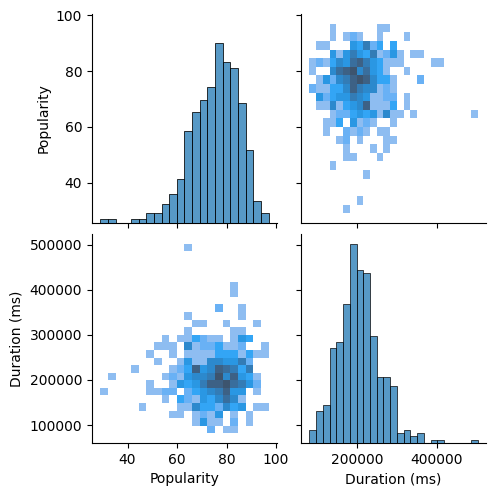

In [202]:
sns.pairplot(numerical_df,kind="hist")
plt.show()

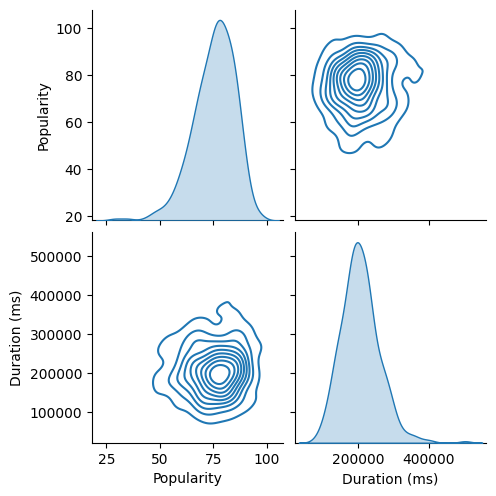

In [203]:
sns.pairplot(numerical_df,kind="kde")
plt.show()

In [204]:
correlation_matrix =numerical_df.corr()
print(correlation_matrix)

               Popularity  Duration (ms)
Popularity       1.000000       0.038992
Duration (ms)    0.038992       1.000000


### 9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

In [205]:
# solution :-

In [206]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [228]:
voi=df.groupby('Artist')['Duration (ms)'].mean().reset_index().head(5)
voi
# since it is a huge data so i am making plot from first 5 rows

,Artist,Duration (ms)
0,*NSYNC,135426.0
1,2 Chainz,227906.0
2,21 Savage,215707.1
3,A Boogie Wit da Hoodie,209269.0
4,A$AP Ferg,283693.0


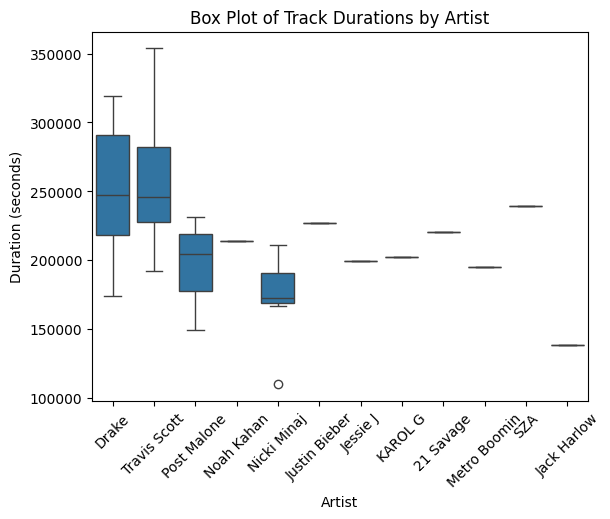

In [230]:
sns.boxplot(x='Artist', y='Duration (ms)', data=df.head(40))
plt.title('Box Plot of Track Durations by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)  # Rotate artist names for better visibility
plt.show()

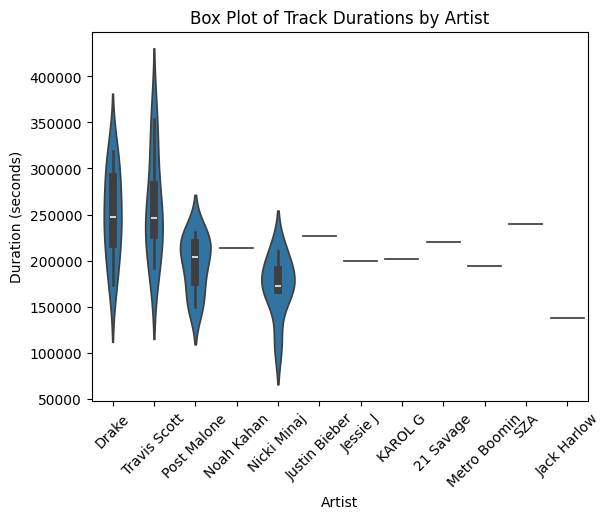

In [231]:
sns.violinplot(x='Artist', y='Duration (ms)', data=df.head(40))
plt.title('Box Plot of Track Durations by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)  # Rotate artist names for better visibility
plt.show()

### 10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [232]:
# solution :-

In [233]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [243]:
df.groupby('Artist')['Popularity'].sum().reset_index()

,Artist,Popularity
0,*NSYNC,67
1,2 Chainz,72
2,21 Savage,838
3,A Boogie Wit da Hoodie,80
4,A$AP Ferg,69
...,...,...
110,Young Nudy,67
111,Young Thug,295
112,benny blanco,72
113,cassö,92


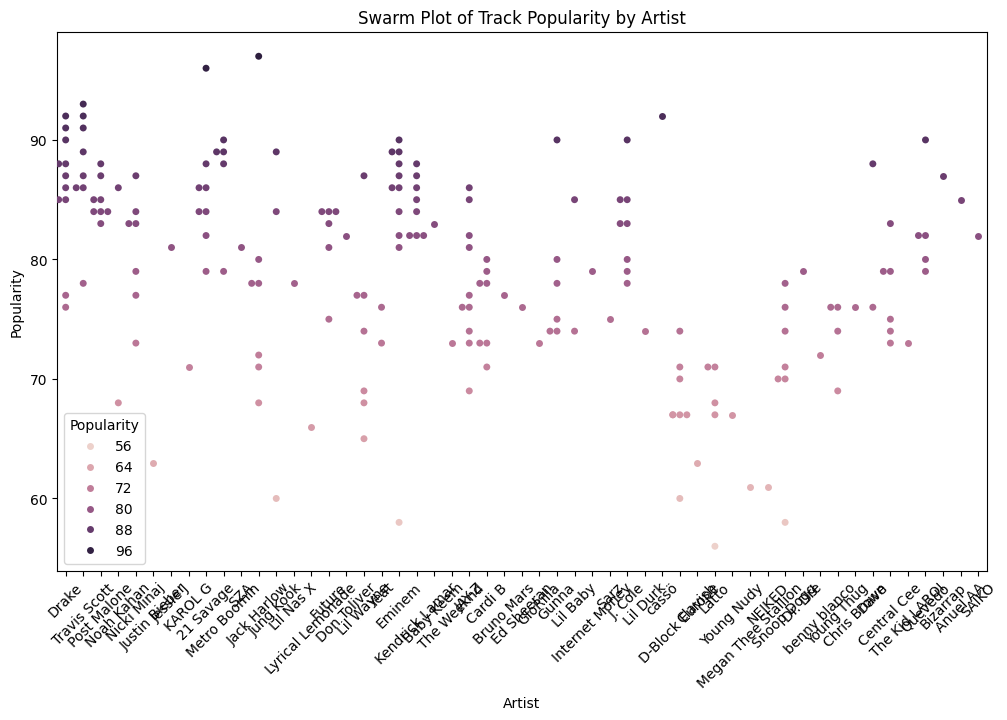

In [253]:
#since the data was large to visualize i am using 90 samples
plt.figure(figsize=(12,7))
sns.swarmplot(x='Artist', y='Popularity', hue='Popularity',data=df.head(190))
plt.title('Swarm Plot of Track Popularity by Artist')
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.show()

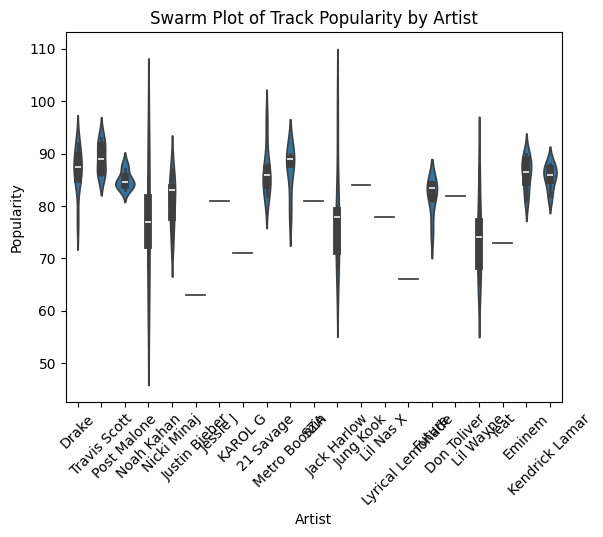

In [248]:
sns.violinplot(x='Artist', y='Popularity',data=df.head(90))
plt.title('Swarm Plot of Track Popularity by Artist')
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.show()